In [1]:
#Multi-calssify Attack using supervised learning model created by Nhung Nguyen 
# Deep Learning
# Library
from keras.models import Model

# Reading CSV

import numpy as np
import pandas as pd

# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from keras import Input, backend
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM, GRU, SimpleRNN
from keras.models import Sequential, Model
import time
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from keras.optimizers import Adam, SGD
#import keras.backend.tensorflow_backend as K
from math import sqrt
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
#mine
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
import keras
from keras import utils
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten

from scipy import interp
from sklearn.metrics import roc_auc_score

In [2]:
#read data
train_df = pd.read_csv('trainingdata.csv')
#Normalize data and one hot Encoder
scalers = {}
#Check type of Data Feature 
for col_name in ('Destination', 'APPID','Time_msec','Goose_pkt_length','Goose_pkt_datSet','Goose_pkt_TimeAllowTolive','Goose_pkt_stNum','Goose_pkt_sqNum','Goose_data'
    ):
        print(train_df[col_name].dtypes)

object
int64
int64
int64
object
int64
int64
int64
bool


In [3]:
#read data
train_df = pd.read_csv('trainingdata.csv')
#Normalize data and one hot Encoder
scalers = {}
train_X = None
data = []
le = preprocessing.LabelEncoder()
#Load all feature 9 
# 
# label encoder 
for col_name in ('Destination', 'APPID','Time_msec','Goose_pkt_length','Goose_pkt_datSet','Goose_pkt_TimeAllowTolive','Goose_pkt_stNum','Goose_pkt_sqNum','Goose_data'
    ):
    if train_df[col_name].dtypes == object or train_df[col_name].dtypes == bool:
        train_df[col_name] = le.fit_transform(train_df[col_name]) 

In [138]:
print(train_df)

      Destination  APPID  Time_msec  Goose_pkt_length  Goose_pkt_datSet  \
0               0      1       2000               122                 0   
1               0      1       2000               122                 0   
2               0      1       2000               122                 0   
3               0      1       2000               122                 0   
4               0      1       2000               122                 0   
...           ...    ...        ...               ...               ...   
1993            0      1          1               122                 0   
1994            0      1          1               122                 0   
1995            0      1       1990               122                 0   
1996            0      1       2000               122                 0   
1997            0      1       2000               122                 0   

      Goose_pkt_TimeAllowTolive  Goose_pkt_stNum  Goose_pkt_sqNum  Goose_data  \
0                 

In [140]:
#Checking whether there is any null values
train_df.isnull().sum()

Destination                  0
APPID                        0
Time_msec                    0
Goose_pkt_length             0
Goose_pkt_datSet             0
Goose_pkt_TimeAllowTolive    0
Goose_pkt_stNum              0
Goose_pkt_sqNum              0
Goose_data                   0
Label                        0
dtype: int64

In [4]:
train_df = pd.read_csv('trainingdata.csv')

scalers = {}
train_X = None
data = []
le = preprocessing.LabelEncoder()

for col_name in ('Destination', 'APPID','Time_msec','Goose_pkt_length','Goose_pkt_datSet','Goose_pkt_TimeAllowTolive','Goose_pkt_stNum','Goose_pkt_sqNum','Goose_data'):
    if train_df[col_name].dtypes == object or train_df[col_name].dtypes == bool :
        train_df[col_name] = le.fit_transform(train_df[col_name]) 
    scalers[col_name] = MinMaxScaler(feature_range=(0, 1))
    data.append(scalers[col_name].fit_transform(np.array(train_df[col_name]).reshape(-1, 1)).reshape(-1))

train_X = np.column_stack(data)
train_X_rs = train_X.reshape(train_X.shape[0],train_X.shape[1],1)

Y = list(train_df['Label'])
for i in range(len(Y)):
    if Y[i] == 'normal':
        Y[i] = 0 
    elif Y[i] == 'DoS':
        Y[i] = 1 
    elif Y[i] == 'Tampering':
        Y[i] = 2 
    else:
        Y[i] = 3 
Y = np.array(Y)


In [5]:
train_df

,Destination,APPID,Time_msec,Goose_pkt_length,Goose_pkt_datSet,Goose_pkt_TimeAllowTolive,Goose_pkt_stNum,Goose_pkt_sqNum,Goose_data,Label
0,0,1,2000,122,0,1500,25,14,0,normal
1,0,1,2000,122,0,1500,25,15,0,normal
2,0,1,2000,122,0,1500,25,16,0,normal
3,0,1,2000,122,0,1500,25,17,0,normal
4,0,1,2000,122,0,1500,25,18,0,normal
...,...,...,...,...,...,...,...,...,...,...
1993,0,1,1,122,0,1500,54,8,1,DoS
1994,0,1,1,122,0,1500,54,9,1,DoS
1995,0,1,1990,122,0,1500,53,188,0,normal
1996,0,1,2000,122,0,1500,53,189,0,normal


In [6]:
train_df.corr()

,Destination,APPID,Time_msec,Goose_pkt_length,Goose_pkt_datSet,Goose_pkt_TimeAllowTolive,Goose_pkt_stNum,Goose_pkt_sqNum,Goose_data
Destination,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
APPID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time_msec,NaN,NaN,1.000000,NaN,NaN,NaN,0.116962,0.402701,-0.850680
Goose_pkt_length,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Goose_pkt_datSet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Goose_pkt_TimeAllowTolive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Goose_pkt_stNum,NaN,NaN,0.116962,NaN,NaN,NaN,1.000000,0.399737,-0.059927
Goose_pkt_sqNum,NaN,NaN,0.402701,NaN,NaN,NaN,0.399737,1.000000,-0.404561
Goose_data,NaN,NaN,-0.850680,NaN,NaN,NaN,-0.059927,-0.404561,1.000000


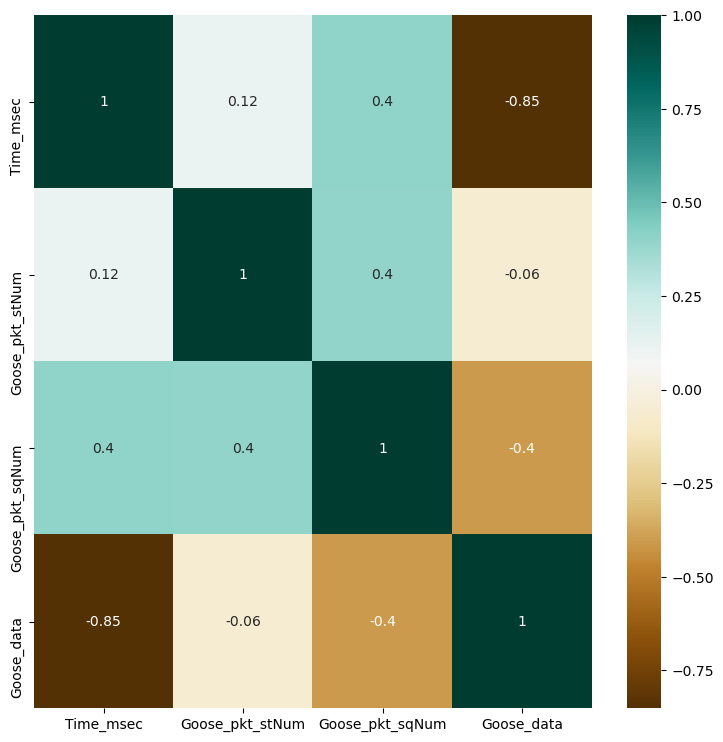

In [144]:
train_df = train_df.dropna('columns')# drop columns with NaN

train_df = train_df[[col for col in train_df if train_df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = train_df.corr()

plt.figure(figsize=(9,9))

sns.heatmap(corr,  cmap='BrBG', annot=True)
#sns.set(font_scale=0.05)
#sns.heatmap(corr)

plt.show()

In [145]:
print(Y[:1000])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 3 0 0 0 0 0 3 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 3 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 3 0 0
 0 0 0 0 0 2 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3
 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 3 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 

In [146]:
print(Y[1958])

1


In [147]:
#============================================Model CNN==================================

In [7]:
#Split data to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, ytrain, ytest = train_test_split(train_X_rs, Y, test_size=0.1,
                                                 random_state=42)
print (X_train.shape)
print(X_test.shape)
print(ytrain.shape)
print(ytest.shape)
#print (labels)

(1798, 9, 1)
(200, 9, 1)
(1798,)
(200,)


In [62]:
folder_name_mod =(0,1,2,3)

In [63]:
#TSNE visualize Data 
from sklearn.manifold import TSNE

def plot_tsne_input(model=None, X=X_train, y=ytrain):
    
    X_tsne_before = TSNE(n_components=2, init='pca', random_state=0).fit_transform(X.reshape((X.shape[0], -1)))
#     X_tsne_after = TSNE(n_components=2, init='pca', random_state=0).fit_transform(encoded_data.reshape((encoded_data.shape[0], -1)))
    
    fig = plt.figure(figsize = (4,4))
    ax = fig.add_subplot(1,1,1) 
    ax.set_title('visualize data before', fontsize = 8)
    
    marker_list = ["o","o","o","o"]
    color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red'] 
    
    
    for i in range(len(folder_name_mod)):
        ax.scatter(X_tsne_before[y == i, 0], X_tsne_before[y == i, 1], facecolors="none", edgecolors=color[i], marker = marker_list[i], s=100 )
#         ax2.scatter(X_tsne_after[y == i, 0], X_tsne_after[y == i, 1], facecolors="none", edgecolors=color[i], marker = marker_list[i], s=100 )
    
    ax.legend(folder_name_mod, fontsize=15)
    ax.tick_params(labelsize=15)
    plt.grid(linestyle='--')
   #plt.savefig('tSNE_input.svg', format='svg')
   # plt.savefig('tSNE_input.png', format='png', dpi=1200)
    plt.show()

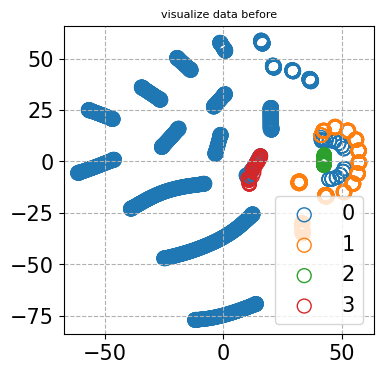

In [64]:
import matplotlib.pyplot as plt
plot_tsne_input(model=None, X=train_X_rs, y=Y) 

In [8]:
#Build MOdel 
loss_function = 'sparse_categorical_crossentropy'
from tensorflow.keras.layers import BatchNormalization, Dropout, MaxPooling1D

#optimizer_function = 'adam'
optimizer_function = Adam(lr=0.002, beta_1=0.5)
# optimizer_function = SGD(lr=0.01, momentum=0.9)

# define cnn model
def define_CNN1D_model(in_shape, out_shape):
    #convnet = Sequential()
    
    convnet = Sequential()
    convnet.add(Conv1D(filters=16, kernel_size=1, strides = 1, padding='same', activation='relu', input_shape=(9,1), name='conv1d_1'))
    convnet.add(Conv1D(filters=64, kernel_size=1, strides = 1, padding='same', activation='relu', name='conv1d_3'))
    convnet.add(BatchNormalization())
    convnet.add(Dropout(0.5))
    convnet.add(Flatten(name='Flatten_1'))
    convnet.add(Dense(128, activation='relu', name='Dense_1'))
    #convnet.add(Dropout(0.3))
    convnet.add(Dense(64, activation='relu', name='Dense_2'))
    #convnet.add(Dropout(0.3))
    convnet.add(Dense(4, activation='softmax', name='Dense_3'))
    # compile model
    convnet.compile(optimizer=optimizer_function, loss='sparse_categorical_crossentropy', metrics=['accuracy'])# compile model
    # compile model
  #  convnet.compile(optimizer=optimizer_function, loss='sparse_categorical_crossentropy', metrics=['accuracy'])# compile model
    return convnet

In [9]:
# =============================Run model=======================================
input_shape = (9,1) #Input shape of CNN model 
output_shape = 4 #Output shape of model 4 classs: No

cnn_model = define_CNN1D_model(input_shape, output_shape)
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 9, 16)             32        
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 9, 64)             1088      
_________________________________________________________________
batch_normalization (BatchNo (None, 9, 64)             256       
_________________________________________________________________
dropout (Dropout)            (None, 9, 64)             0         
_________________________________________________________________
Flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
Dense_1 (Dense)              (None, 128)               73856     
_________________________________________________________________
Dense_2 (Dense)              (None, 64)                8

In [10]:
#=============================Training model==================================
train_model = cnn_model.fit(X_train, ytrain, 
                            epochs = 300, 
                            batch_size = 64,
                            shuffle = True, 
                            validation_split = 0.1, 
                            verbose = 2)  

Epoch 1/300
26/26 - 0s - loss: 0.3291 - accuracy: 0.8764 - val_loss: 1.0794 - val_accuracy: 0.8944
Epoch 2/300
26/26 - 0s - loss: 0.1438 - accuracy: 0.9536 - val_loss: 0.9981 - val_accuracy: 0.9222
Epoch 3/300
26/26 - 0s - loss: 0.0993 - accuracy: 0.9747 - val_loss: 0.8041 - val_accuracy: 0.9722
Epoch 4/300
26/26 - 0s - loss: 0.0827 - accuracy: 0.9796 - val_loss: 0.7025 - val_accuracy: 0.9722
Epoch 5/300
26/26 - 0s - loss: 0.0799 - accuracy: 0.9790 - val_loss: 0.6940 - val_accuracy: 0.9722
Epoch 6/300
26/26 - 0s - loss: 0.0718 - accuracy: 0.9759 - val_loss: 0.5899 - val_accuracy: 0.9722
Epoch 7/300
26/26 - 0s - loss: 0.0647 - accuracy: 0.9784 - val_loss: 0.4719 - val_accuracy: 0.9722
Epoch 8/300
26/26 - 0s - loss: 0.0615 - accuracy: 0.9808 - val_loss: 0.3266 - val_accuracy: 0.9722
Epoch 9/300
26/26 - 0s - loss: 0.0671 - accuracy: 0.9784 - val_loss: 0.3245 - val_accuracy: 0.9722
Epoch 10/300
26/26 - 0s - loss: 0.0695 - accuracy: 0.9796 - val_loss: 0.4498 - val_accuracy: 0.9722
Epoch 11/

26/26 - 0s - loss: 0.0413 - accuracy: 0.9864 - val_loss: 0.0826 - val_accuracy: 0.9778
Epoch 84/300
26/26 - 0s - loss: 0.0465 - accuracy: 0.9864 - val_loss: 0.0780 - val_accuracy: 0.9778
Epoch 85/300
26/26 - 0s - loss: 0.0435 - accuracy: 0.9876 - val_loss: 0.0626 - val_accuracy: 0.9778
Epoch 86/300
26/26 - 0s - loss: 0.0452 - accuracy: 0.9864 - val_loss: 0.0725 - val_accuracy: 0.9778
Epoch 87/300
26/26 - 0s - loss: 0.0444 - accuracy: 0.9870 - val_loss: 0.0643 - val_accuracy: 0.9778
Epoch 88/300
26/26 - 0s - loss: 0.0430 - accuracy: 0.9858 - val_loss: 0.0900 - val_accuracy: 0.9778
Epoch 89/300
26/26 - 0s - loss: 0.0437 - accuracy: 0.9845 - val_loss: 0.0714 - val_accuracy: 0.9778
Epoch 90/300
26/26 - 0s - loss: 0.0717 - accuracy: 0.9790 - val_loss: 0.0612 - val_accuracy: 0.9833
Epoch 91/300
26/26 - 0s - loss: 0.0517 - accuracy: 0.9839 - val_loss: 0.0941 - val_accuracy: 0.9722
Epoch 92/300
26/26 - 0s - loss: 0.0412 - accuracy: 0.9895 - val_loss: 0.0817 - val_accuracy: 0.9778
Epoch 93/300


Epoch 165/300
26/26 - 0s - loss: 0.0419 - accuracy: 0.9864 - val_loss: 0.0936 - val_accuracy: 0.9778
Epoch 166/300
26/26 - 0s - loss: 0.0450 - accuracy: 0.9870 - val_loss: 0.0910 - val_accuracy: 0.9722
Epoch 167/300
26/26 - 0s - loss: 0.0413 - accuracy: 0.9858 - val_loss: 0.0994 - val_accuracy: 0.9778
Epoch 168/300
26/26 - 0s - loss: 0.0446 - accuracy: 0.9852 - val_loss: 0.0842 - val_accuracy: 0.9778
Epoch 169/300
26/26 - 0s - loss: 0.0460 - accuracy: 0.9852 - val_loss: 0.0962 - val_accuracy: 0.9722
Epoch 170/300
26/26 - 0s - loss: 0.0376 - accuracy: 0.9883 - val_loss: 0.0765 - val_accuracy: 0.9778
Epoch 171/300
26/26 - 0s - loss: 0.0408 - accuracy: 0.9883 - val_loss: 0.0897 - val_accuracy: 0.9778
Epoch 172/300
26/26 - 0s - loss: 0.0457 - accuracy: 0.9876 - val_loss: 0.0868 - val_accuracy: 0.9778
Epoch 173/300
26/26 - 0s - loss: 0.0394 - accuracy: 0.9870 - val_loss: 0.0794 - val_accuracy: 0.9722
Epoch 174/300
26/26 - 0s - loss: 0.0379 - accuracy: 0.9883 - val_loss: 0.0727 - val_accurac

26/26 - 0s - loss: 0.0655 - accuracy: 0.9815 - val_loss: 0.0615 - val_accuracy: 0.9778
Epoch 247/300
26/26 - 0s - loss: 0.0428 - accuracy: 0.9883 - val_loss: 0.0987 - val_accuracy: 0.9778
Epoch 248/300
26/26 - 0s - loss: 0.0430 - accuracy: 0.9839 - val_loss: 0.0798 - val_accuracy: 0.9778
Epoch 249/300
26/26 - 0s - loss: 0.0373 - accuracy: 0.9895 - val_loss: 0.0785 - val_accuracy: 0.9778
Epoch 250/300
26/26 - 0s - loss: 0.0397 - accuracy: 0.9895 - val_loss: 0.0881 - val_accuracy: 0.9778
Epoch 251/300
26/26 - 0s - loss: 0.0396 - accuracy: 0.9876 - val_loss: 0.0806 - val_accuracy: 0.9778
Epoch 252/300
26/26 - 0s - loss: 0.0447 - accuracy: 0.9876 - val_loss: 0.0815 - val_accuracy: 0.9778
Epoch 253/300
26/26 - 0s - loss: 0.0417 - accuracy: 0.9876 - val_loss: 0.0861 - val_accuracy: 0.9778
Epoch 254/300
26/26 - 0s - loss: 0.0425 - accuracy: 0.9858 - val_loss: 0.0858 - val_accuracy: 0.9778
Epoch 255/300
26/26 - 0s - loss: 0.0393 - accuracy: 0.9883 - val_loss: 0.0820 - val_accuracy: 0.9778
Epoc

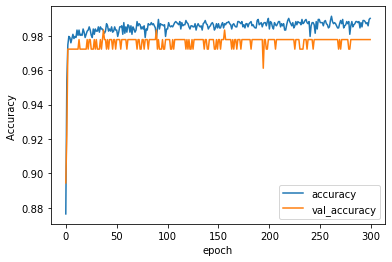

In [11]:
import matplotlib.pyplot as plt

# plot a graph of 'loss'

plt.plot(train_model.history['accuracy'])
plt.plot(train_model.history['val_accuracy'])
#plt.title('Accuracy')
plt.ylabel('Accuracy ')
plt.xlabel('epoch')
plt.legend(['accuracy','val_accuracy'])
plt.show()

In [12]:
# Test model
test_model = cnn_model.evaluate(X_test, ytest)

7/7 [==============================] - 0s 1ms/step - loss: 0.0273 - accuracy: 0.9950


In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from imblearn.metrics import classification_report_imbalanced
import seaborn as sns
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix
import itertools

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

    
def plot_confusion_matrix(cm, classes=None,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    mpl.rcParams.update(mpl.rcParamsDefault)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    classes = ('Normal','DoS', 'Tampering', 'Spoofing')
    print(cm)
    plt.figure(figsize=(5, 5)) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(shrink=0.75)
    tick_marks = np.arange(len(list(range(cm.shape[0]))))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes,rotation=45)
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    return plt


Confusion matrix, without normalization
[[157   0   0   0]
 [  1  35   0   0]
 [  0   0   4   0]
 [  0   0   0   3]]


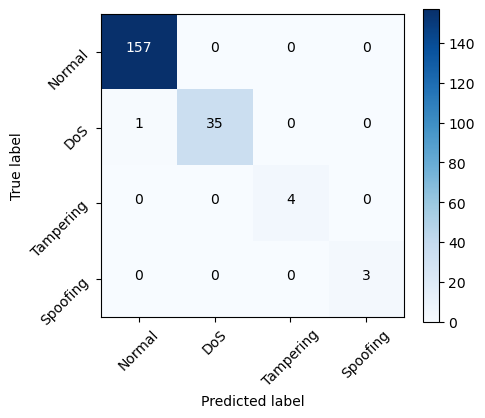

In [14]:
pred = np.argmax(cnn_model.predict(X_test), axis=1).reshape(-1,1)
# utils.confusion_plot(pred,data.y_test)
plot_confusion_matrix(confusion_matrix(pred,ytest),  normalize=False,title=None)
plt.savefig("confusion matrixn_9feature.pdf")

In [ ]:
#===========================Model FNN ======================

In [19]:
#FNN
model_ffnn = Sequential()
model_ffnn.add(Flatten())
#metrics=ModelMetrics()
model_ffnn.add(Dense(16, input_dim=train_X_rs.shape[0], activation='relu'))
model_ffnn.add(Dense(32, activation='relu'))
model_ffnn.add(Dense(64, activation='relu'))
model_ffnn.add(Dense(16, activation='relu'))
model_ffnn.add(Dense(4,activation = 'softmax'))
model_ffnn.compile(optimizer=Adam(lr = 0.006), loss='sparse_categorical_crossentropy',metrics=['accuracy'])
FNN=model_ffnn.fit(X_train,ytrain,batch_size=16,epochs=300, validation_split = 0.1)

Epoch 1/300
102/102 [==============================] - 0s 2ms/step - loss: 0.3531 - accuracy: 0.8857 - val_loss: 0.2480 - val_accuracy: 0.8833
Epoch 2/300
102/102 [==============================] - 0s 961us/step - loss: 0.1639 - accuracy: 0.9357 - val_loss: 0.1775 - val_accuracy: 0.9111
Epoch 3/300
102/102 [==============================] - 0s 942us/step - loss: 0.1617 - accuracy: 0.9370 - val_loss: 0.1172 - val_accuracy: 0.9722
Epoch 4/300
102/102 [==============================] - 0s 941us/step - loss: 0.0869 - accuracy: 0.9802 - val_loss: 0.0813 - val_accuracy: 0.9667
Epoch 5/300
102/102 [==============================] - 0s 922us/step - loss: 0.0915 - accuracy: 0.9716 - val_loss: 0.0735 - val_accuracy: 0.9722
Epoch 6/300
102/102 [==============================] - 0s 941us/step - loss: 0.0556 - accuracy: 0.9815 - val_loss: 0.1079 - val_accuracy: 0.9722
Epoch 7/300
102/102 [==============================] - 0s 941us/step - loss: 0.0583 - accuracy: 0.9808 - val_loss: 0.0812 - val_accu

102/102 [==============================] - 0s 951us/step - loss: 0.0380 - accuracy: 0.9889 - val_loss: 0.0894 - val_accuracy: 0.9778
Epoch 114/300
102/102 [==============================] - 0s 951us/step - loss: 0.0371 - accuracy: 0.9901 - val_loss: 0.0766 - val_accuracy: 0.9778
Epoch 115/300
102/102 [==============================] - 0s 932us/step - loss: 0.0420 - accuracy: 0.9870 - val_loss: 0.0831 - val_accuracy: 0.9778
Epoch 116/300
102/102 [==============================] - 0s 951us/step - loss: 0.0378 - accuracy: 0.9895 - val_loss: 0.1008 - val_accuracy: 0.9778
Epoch 117/300
102/102 [==============================] - 0s 971us/step - loss: 0.0417 - accuracy: 0.9883 - val_loss: 0.0793 - val_accuracy: 0.9778
Epoch 118/300
102/102 [==============================] - 0s 932us/step - loss: 0.0374 - accuracy: 0.9889 - val_loss: 0.0736 - val_accuracy: 0.9778
Epoch 119/300
102/102 [==============================] - 0s 941us/step - loss: 0.0382 - accuracy: 0.9883 - val_loss: 0.0826 - val_ac

Epoch 169/300
102/102 [==============================] - 0s 946us/step - loss: 0.0353 - accuracy: 0.9895 - val_loss: 0.0681 - val_accuracy: 0.9722
Epoch 170/300
102/102 [==============================] - 0s 956us/step - loss: 0.0399 - accuracy: 0.9889 - val_loss: 0.0839 - val_accuracy: 0.9778
Epoch 171/300
102/102 [==============================] - 0s 981us/step - loss: 0.0590 - accuracy: 0.9858 - val_loss: 0.0706 - val_accuracy: 0.9778
Epoch 172/300
102/102 [==============================] - 0s 961us/step - loss: 0.0369 - accuracy: 0.9883 - val_loss: 0.0719 - val_accuracy: 0.9778
Epoch 173/300
102/102 [==============================] - 0s 971us/step - loss: 0.0371 - accuracy: 0.9895 - val_loss: 0.0510 - val_accuracy: 0.9833
Epoch 174/300
102/102 [==============================] - 0s 961us/step - loss: 0.0358 - accuracy: 0.9901 - val_loss: 0.0734 - val_accuracy: 0.9778
Epoch 175/300
102/102 [==============================] - 0s 951us/step - loss: 0.0357 - accuracy: 0.9901 - val_loss: 0

Epoch 225/300
102/102 [==============================] - 0s 932us/step - loss: 0.0528 - accuracy: 0.9889 - val_loss: 0.0788 - val_accuracy: 0.9778
Epoch 226/300
102/102 [==============================] - 0s 941us/step - loss: 0.0413 - accuracy: 0.9864 - val_loss: 0.0714 - val_accuracy: 0.9778
Epoch 227/300
102/102 [==============================] - 0s 951us/step - loss: 0.0380 - accuracy: 0.9895 - val_loss: 0.0690 - val_accuracy: 0.9722
Epoch 228/300
102/102 [==============================] - 0s 932us/step - loss: 0.0364 - accuracy: 0.9901 - val_loss: 0.0699 - val_accuracy: 0.9722
Epoch 229/300
102/102 [==============================] - 0s 951us/step - loss: 0.0310 - accuracy: 0.9895 - val_loss: 0.0927 - val_accuracy: 0.9778
Epoch 230/300
102/102 [==============================] - 0s 961us/step - loss: 0.0338 - accuracy: 0.9901 - val_loss: 0.0986 - val_accuracy: 0.9778
Epoch 231/300
102/102 [==============================] - 0s 961us/step - loss: 0.0348 - accuracy: 0.9895 - val_loss: 0

Epoch 281/300
102/102 [==============================] - 0s 946us/step - loss: 0.0331 - accuracy: 0.9895 - val_loss: 0.0744 - val_accuracy: 0.9778
Epoch 282/300
102/102 [==============================] - 0s 941us/step - loss: 0.0329 - accuracy: 0.9907 - val_loss: 0.0629 - val_accuracy: 0.9778
Epoch 283/300
102/102 [==============================] - 0s 932us/step - loss: 0.0427 - accuracy: 0.9858 - val_loss: 0.0655 - val_accuracy: 0.9778
Epoch 284/300
102/102 [==============================] - 0s 951us/step - loss: 0.0357 - accuracy: 0.9895 - val_loss: 0.0825 - val_accuracy: 0.9778
Epoch 285/300
102/102 [==============================] - 0s 951us/step - loss: 0.0333 - accuracy: 0.9895 - val_loss: 0.0624 - val_accuracy: 0.9778
Epoch 286/300
102/102 [==============================] - 0s 932us/step - loss: 0.0333 - accuracy: 0.9907 - val_loss: 0.0666 - val_accuracy: 0.9778
Epoch 287/300
102/102 [==============================] - 0s 951us/step - loss: 0.0313 - accuracy: 0.9901 - val_loss: 0

In [20]:
# Test model
test_model = model_ffnn.evaluate(X_test, ytest)

7/7 [==============================] - 0s 714us/step - loss: 0.0259 - accuracy: 0.9950


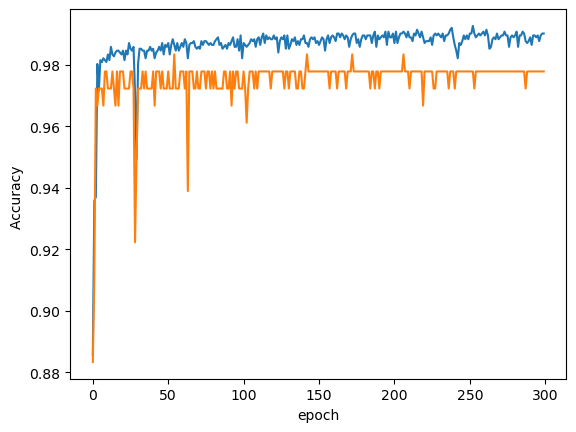

In [21]:
import matplotlib.pyplot as plt

# plot a graph of 'loss'

plt.plot(FNN.history['accuracy'])
plt.plot(FNN.history['val_accuracy'])
#plt.title('Accuracy')
plt.ylabel('Accuracy ')
plt.xlabel('epoch')
#plt.legend(['accuracy','val_accuracy'])
plt.show()

Confusion matrix, without normalization
[[157   1   0   0]
 [  0  35   0   0]
 [  0   0   4   0]
 [  0   0   0   3]]


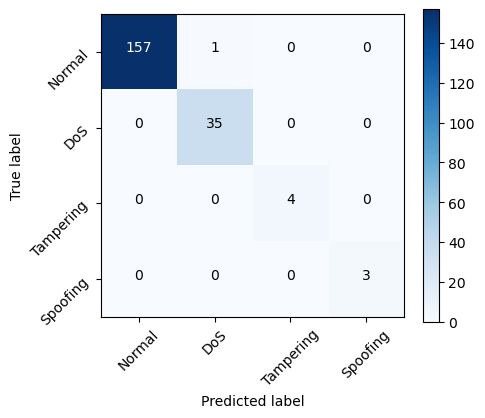

In [22]:
pred = np.argmax(model_ffnn.predict(X_test), axis=1).reshape(-1,1)
# utils.confusion_plot(pred,data.y_test)
plot_confusion_matrix(confusion_matrix(ytest,pred),  normalize=False,title=None)
plt.savefig("confusion matrixn_Fnnfeature.pdf")

In [23]:
#SVM 

from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [29]:
#Split data to train and test
from sklearn.model_selection import train_test_split
X_train1, X_test1, ytrain1, ytest1 = train_test_split(train_X, Y, test_size=0.1,
                                                 random_state=42)
print (X_train1.shape)
print(X_test1.shape)
print(ytrain1.shape)
print(ytest1.shape)
#print (labels)

(1798, 9)
(200, 9)
(1798,)
(200,)


In [75]:
#Split data to train and test
from sklearn.model_selection import train_test_split
X_train1, X_test1, ytrain1, ytest1 = train_test_split(train_X, Y, test_size=0.2,
                                                 random_state=42)
print (X_train1.shape)
print(X_test1.shape)
print(ytrain1.shape)
print(ytest1.shape)
#print (labels)

(1598, 9)
(400, 9)
(1598,)
(400,)


In [76]:
SVM = svm.SVC(kernel='rbf', degree=3, C=1).fit(X_train1, ytrain1)
#poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, ytrain)

In [77]:
pred = SVM.predict(X_test1)

In [78]:
accuracy = accuracy_score(ytest1, pred)
f1 = f1_score(ytest1,pred, average='weighted')
print('Accuracy of SVM: ', "%.2f" % (accuracy*100))
print('F1: ', "%.2f" % (f1*100))

Accuracy of SVM:  94.75
F1:  93.68


Confusion matrix, without normalization
[[311   0   0  11]
 [  3  67   0   0]
 [  0   0   7   0]
 [  0   0   0   1]]


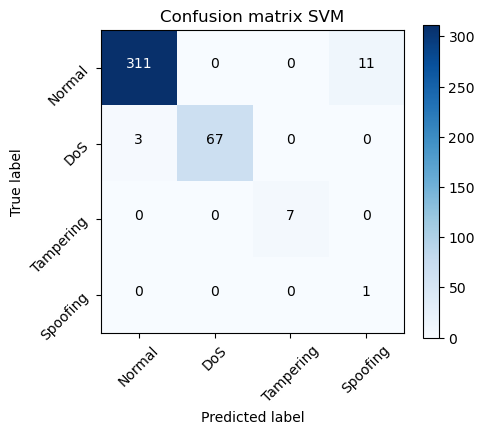

In [79]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix

y_pred = rbf.predict(X_test1)
confusion_matrix(ytest1, y_pred)
plot_confusion_matrix(confusion_matrix(y_pred,ytest1),  normalize=False,title='Confusion matrix SVM')
plt.savefig("confusion matrixSVM00.pdf")
plt.show()